1.5.0
Full train dataset shape is (1460, 81)
1053 examples in training, 407 examples in testing.
Use /tmp/tmphm586pvz as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.922496. Found 1053 examples.
Training model...
Model trained in 0:00:02.744481
Compiling model...
Model compiled.


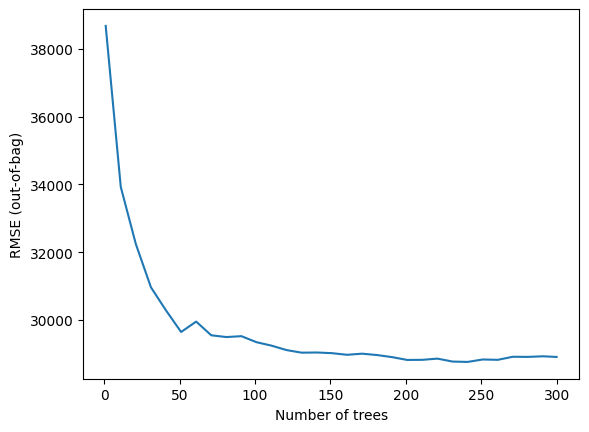

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_decision_forests as tfdf

print(tfdf.__version__)#1.5.0

train_file_path = "train.csv"
dataset_df = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(dataset_df.shape))

dataset_df = dataset_df.drop('Id', axis=1)
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])

def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(len(train_ds_pd), len(valid_ds_pd)))
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"])
rf.fit(x=train_ds)

In [ ]:
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [59]:
column_names = ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']

house_data1 = [1461, 20, 'RH', 80.0, 11622, 'Pave', None, 'Reg', 'Lvl', 'AllPub', 'Inside', 'Gtl', 'NAmes', 'Feedr', 'Norm', '1Fam', '1Story', 5, 6, 1961, 1961, 'Gable', 'CompShg', 'VinylSd', 'VinylSd', None, 0.0, 'TA', 'TA', 'CBlock', 'TA', 'TA', 'No', 'Rec', 468.0, 'LwQ', 144.0, 270.0, 882.0, 'GasA', 'TA', 'Y', 'SBrkr', 896, 0, 0, 896, 0.0, 0.0, 1, 0, 2, 1, 'TA', 5, 'Typ', 0, None, 'Attchd', 1961.0, 'Unf', 1.0, 730.0, 'TA', 'TA', 'Y', 140, 0, 0, 0, 120, 0, None, 'MnPrv', None, 0, 6, 2010, 'WD', 'Normal']
house1 = [dict(zip(column_names, house_data1))]

#Increased area of the house and garage, newer year of construction
house_data2 = [1461, 20, 'RH', 80.0, 15622, 'Pave', None, 'Reg', 'Lvl', 'AllPub', 'Inside', 'Gtl', 'NAmes', 'Feedr', 'Norm', '1Fam', '1Story', 5, 6, 2021, 2021, 'Gable', 'CompShg', 'VinylSd', 'VinylSd', None, 0.0, 'TA', 'TA', 'CBlock', 'TA', 'TA', 'No', 'Rec', 468.0, 'LwQ', 144.0, 270.0, 882.0, 'GasA', 'TA', 'Y', 'SBrkr', 896, 0, 0, 896, 0.0, 0.0, 1, 0, 2, 1, 'TA', 5, 'Typ', 0, None, 'Attchd', 2021, 'Unf', 1.0, 1500.0, 'TA', 'TA', 'Y', 140, 0, 0, 0, 120, 0, None, 'MnPrv', None, 0, 6, 2020, 'WD', 'Normal']
house2 = [dict(zip(column_names, house_data2))]

house_df = pd.DataFrame(house2)
house = tfdf.keras.pd_dataframe_to_tf_dataset(house_df, task = tfdf.keras.Task.REGRESSION)

preds = rf.predict(house)
price = int(preds.squeeze())
print(price)

1/1 [==============================] - 0s 328ms/step
134234
